Check batch generator from image loader

In [1]:
# !cd ../../../ramp-workflow/ && python setup.py install

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import os, sys

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

sys.path.append("../submissions")
sys.path.append("..")

from rampwf.workflows.simplified_image_classifier import ImageLoader
from problem import get_cv, get_train_data, get_test_data

In [3]:
folder_X_array, y_array = get_train_data(path="..")
cv = list(get_cv(folder_X_array, y_array))

for fold_i, (train_is, valid_is) in enumerate(cv):

    folder, X_array = folder_X_array
    if train_is is None:
        train_is = slice(None, None, None)

    img_loader = ImageLoader(X_array[train_is], y_array[train_is], folder=folder, n_classes=403)

    
# img_loader.setup_backend('opencv')

In [4]:
from keras_ensembling_0.image_classifier import BatchGeneratorBuilder

Using TensorFlow backend.


In [5]:
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
import numpy as np

def normalize(in_img, q_min=0.5, q_max=99.5, return_mins_maxs=False):
    """
    Normalize image in [0.0, 1.0]
    mins is array of minima
    maxs is array of differences between maxima and minima
    """
    init_shape = in_img.shape
    if len(init_shape) == 2:
        in_img = np.expand_dims(in_img, axis=2)
    w, h, d = in_img.shape
    img = in_img.copy()
    img = np.reshape(img, [w * h, d]).astype(np.float64)
    mins = np.percentile(img, q_min, axis=0)
    maxs = np.percentile(img, q_max, axis=0) - mins
    maxs[(maxs < 0.0001) & (maxs > -0.0001)] = 0.0001
    img = (img - mins[None, :]) / maxs[None, :]
    img = img.clip(0.0, 1.0)
    img = np.reshape(img, [w, h, d])
    if init_shape != img.shape:
        img = img.reshape(init_shape)
    if return_mins_maxs:
        return img, mins, maxs
    return img


def scale_percentile(matrix, q_min=0.5, q_max=99.5):
    is_gray = False
    if len(matrix.shape) == 2:
        is_gray = True
        matrix = matrix.reshape(matrix.shape + (1,))
    matrix = (255 * normalize(matrix, q_min, q_max)).astype(np.uint8)
    if is_gray:
        matrix = matrix.reshape(matrix.shape[:2])
    return matrix

In [17]:
batch_generator = BatchGeneratorBuilder(img_loader, chunk_size=64, n_jobs=15)

In [18]:
gen_train, gen_valid, nb_train, nb_valid, class_weights = \
    batch_generator.get_train_valid_generators(batch_size=32, valid_ratio=0.1)

In [13]:
max_count = 5
for batch_xs, batch_y in gen_train:        
    print(np.argmax(batch_y, axis=1))
    max_count -= 1
    if max_count == 0:
        break

[124  31 179 202 170   3  55 171  27 193  27  57 159 148 159 159  57 108
 159 202 191 191   3  27 188  72  20  57 202  90  55  42]
[ 79  35 134  57  74 134 159  94  25  57  23  55 144 103 159  92  94 170
 202 181 202  94 134  18 200  84 202 202 202  67  94   1]
[159  57 202 202  57 136 183   8  42 131  35 140  72   3 119 131 197 159
  67 155 175  25 129  72 124 179  35  20  24  73 159 159]
[ 41 361 202   0  94  39   0 159  94 140  19 365   3 149 131  33  82  72
  14  15  84 164 175 163  75 167  94  57  86 202 208 151]
[159  57 121  91 167  66 183 202 200 108 170 167  69 202 202 140  79 107
  15 379 134  94 179 202 200 132  27 158 202 183 159 131]


In [22]:
# max_count = 5
# for batch_x, batch_y in gen_train:        
#     plt.figure(figsize=(12, 4))
#     for j in range(batch_x.shape[0]):
#         img = scale_percentile(batch_x[j, :, :, :])
#         plt.subplot(1, len(batch_x), j + 1)
#         plt.imshow(img)
#         plt.title(np.argmax(batch_y[j]))
#         plt.axis('off')

#     max_count -= 1
#     if max_count == 0:
#         break

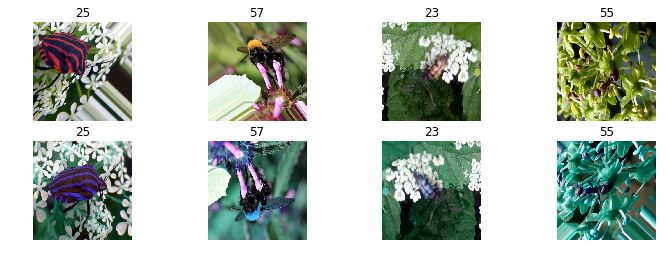

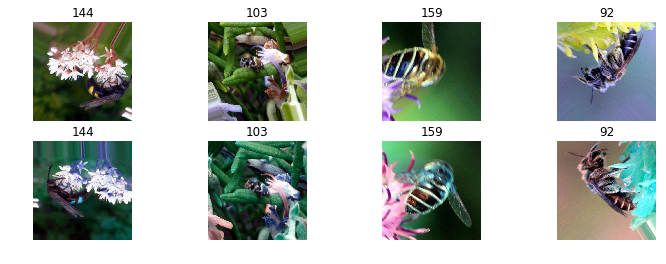

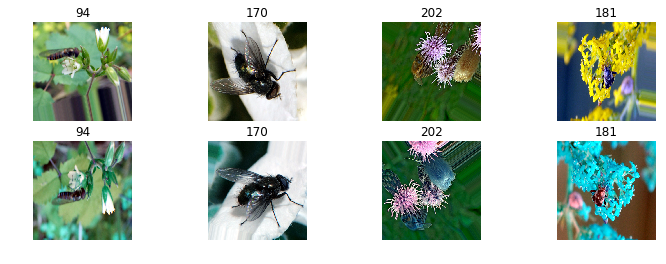

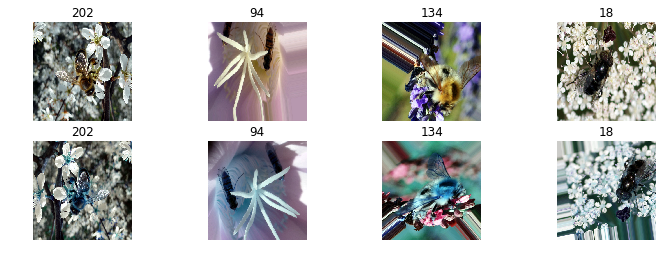

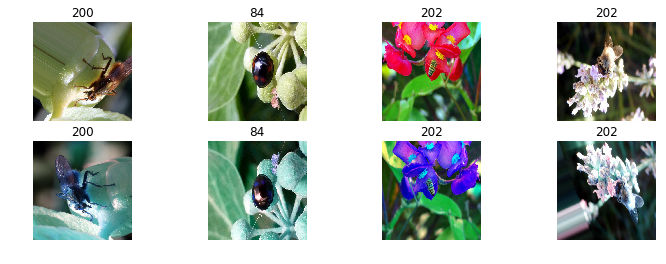

In [24]:
max_count = 5
for batch_xs, batch_y in gen_train:        
    plt.figure(figsize=(12, 4))
    for i, batch_x in enumerate(batch_xs):
        ll = len(batch_x)
        for j, x in enumerate(batch_x):
            img = scale_percentile(x)
            plt.subplot(len(batch_xs), ll, ll * i + j + 1)
            plt.imshow(img)
            plt.title(np.argmax(batch_y[j]))
            plt.axis('off')

    max_count -= 1
    if max_count == 0:
        break

In [27]:
from keras_Xception_finetunning_imbalanced.image_classifier import BatchGeneratorBuilder, _transform_fn, _transform_test_fn


batch_generator = BatchGeneratorBuilder(img_loader, _transform_fn, _transform_test_fn, shuffle=True, chunk_size=64, n_jobs=15)
gen_train, gen_valid, nb_train, nb_valid, class_weights = batch_generator.get_train_valid_generators(batch_size=32, valid_ratio=0.1)

In [26]:
for i, (batch_xs, batch_y) in enumerate(gen_train):    
    if i % 10 == 0:
        print(i, nb_train / 32)

0 1312
10 1312
20 1312
30 1312
40 1312
50 1312
60 1312
70 1312
80 1312
90 1312
100 1312
110 1312
120 1312
130 1312
140 1312
150 1312
160 1312
170 1312
180 1312
190 1312
200 1312
210 1312
220 1312
230 1312
240 1312
250 1312
260 1312
270 1312
280 1312
290 1312
300 1312
310 1312
320 1312
330 1312
340 1312
350 1312
360 1312
370 1312
380 1312
390 1312
400 1312
410 1312
420 1312
430 1312
440 1312
450 1312
460 1312
470 1312
480 1312
490 1312
500 1312
510 1312
520 1312
530 1312
540 1312
550 1312
560 1312
570 1312
580 1312
590 1312
600 1312
610 1312
620 1312
630 1312
640 1312
650 1312
660 1312
670 1312
680 1312
690 1312
700 1312
710 1312
720 1312
730 1312
740 1312
750 1312
760 1312
770 1312
780 1312
790 1312
800 1312
810 1312
820 1312
830 1312
840 1312
850 1312
860 1312
870 1312
880 1312
890 1312
900 1312
910 1312
920 1312
930 1312
940 1312
950 1312
960 1312
970 1312
980 1312
990 1312
1000 1312
1010 1312
1020 1312
1030 1312
1040 1312
1050 1312
1060 1312
1070 1312
1080 1312
1090 1312
1100 1312
1

KeyboardInterrupt: 

In [37]:
(folder, X_array), y_array = get_test_data(path="..")
img_loader = ImageLoader(X_array, None, folder=folder, n_classes=403)

In [43]:
from keras_Xception_finetunning_imbalanced.image_classifier import BatchGeneratorBuilder, _transform_fn, _transform_test_fn


batch_generator = BatchGeneratorBuilder(img_loader, _transform_fn, _transform_test_fn, shuffle=False, chunk_size=64, n_jobs=15)
gen_test, nb_test = batch_generator.get_test_generator(batch_size=32)

In [44]:
for i, batch_x in enumerate(gen_test):    
    print(i, batch_x.mean())
    if i == 10:
        break

0 -0.0556466
1 -0.0193831
2 0.0525448
3 0.0347109
4 0.0636227
5 0.0468908
6 0.0713415
7 0.240399
8 0.0685171
9 -0.0377317
10 0.0984754


In [41]:
for i, batch_x in enumerate(gen_test):    
    print(i, batch_x.mean())
    if i == 10:
        break

0 -0.0556466
1 -0.0193832
2 0.0525449
3 0.0347109
4 0.0636227
5 0.0468906
6 0.0713414
7 0.240399
8 0.0685171
9 -0.0377315
10 0.0984755


In [22]:
from keras_Xception_finetunning_imbalanced.image_classifier import ImageClassifier

In [23]:
ic = ImageClassifier()

In [24]:
(folder, X_array), y_array = get_test_data(path="..")
img_loader = ImageLoader(X_array, None, folder=folder, n_classes=403)

y_probas = ic.predict_proba(img_loader)

- TTA round: 0

4/4 [==============================] - ETA: 0s
- TTA round: 1

4/4 [==============================] - ETA: 0s
- TTA round: 2

4/4 [==============================] - ETA: 0s
- TTA round: 3

4/4 [==============================] - ETA: 0s
- TTA round: 4

4/4 [==============================] - ETA: 0s
- TTA round: 5

4/4 [==============================] - ETA: 0s
- TTA round: 6

4/4 [==============================] - ETA: 0s
- TTA round: 7

4/4 [==============================] - ETA: 0s
- TTA round: 8

4/4 [==============================] - ETA: 0s
- TTA round: 9

4/4 [==============================] - ETA: 0s


In [25]:
y_probas.shape

(100, 403)

In [26]:
y_probas[0, :]

array([ 0.002044  ,  0.00238605,  0.00329974,  0.00247519,  0.00317507,
        0.00260407,  0.00378777,  0.00318887,  0.00215876,  0.00216061,
        0.0029414 ,  0.00215475,  0.00241248,  0.00240466,  0.00124513,
        0.00199858,  0.00270034,  0.00292634,  0.00280141,  0.00229487,
        0.00148839,  0.00355018,  0.00270533,  0.00219379,  0.0023019 ,
        0.00265374,  0.00341111,  0.00255972,  0.00274317,  0.0027777 ,
        0.00185399,  0.00272799,  0.00203182,  0.00199429,  0.0036936 ,
        0.00178796,  0.00263331,  0.0030926 ,  0.00276141,  0.00210745,
        0.00207493,  0.00323482,  0.00203325,  0.00179602,  0.00206605,
        0.00195532,  0.00223913,  0.00220003,  0.0018295 ,  0.00240103,
        0.00344771,  0.0026364 ,  0.00234635,  0.00325891,  0.0026491 ,
        0.00246539,  0.00207339,  0.00305433,  0.00214982,  0.00329544,
        0.00150014,  0.00218154,  0.00266572,  0.00349905,  0.00319323,
        0.00204351,  0.00281083,  0.0028351 ,  0.00300511,  0.00